In [6]:
# import packages and verify versions

# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__)

numpy: 1.19.4
scipy: 1.6.2
matplotlib: 3.3.3
pandas: 1.2.4
sklearn: 0.24.2


Automatically created module for IPython interactive environment


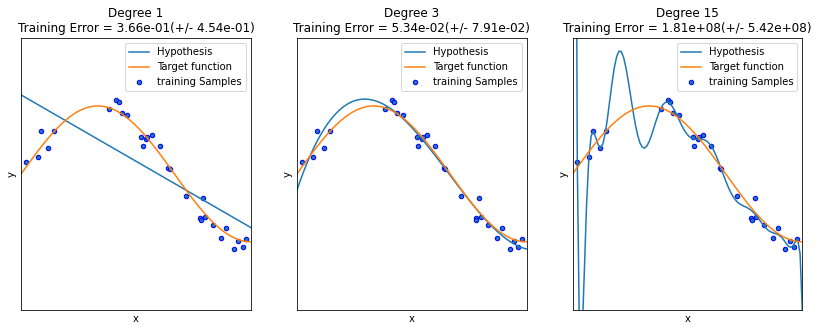

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
print(__doc__)


def true_fun(X):
    return np.sin(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
# degrees for polynomial functions
degrees = [1, 3, 15]

X = np.sort(np.random.rand(n_samples))
noise = np.random.randn(n_samples) * 0.1
y = true_fun(X) + noise

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    # setp = "set property": setp(obj, *args, **kwargs)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    
    # Evaluate the models using cross-validation
    # cross_val_score:
    #   cv: split number to cross-evaluate
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Hypothesis")
    plt.plot(X_test, true_fun(X_test), label="Target function")
    # plt.satter:
    #   s: size(default=20)
    plt.scatter(X, y, edgecolor='b', s=20, label="training Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nTraining Error = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
X